In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt


In [21]:
def classical_matrix_multiplication(A, B):
    n = len(A)
    result = np.zeros((n, n))
    
    # Classical matrix multiplication using three nested loops
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

def test_classical():
    # Example matrices (4x4)
    A = np.array([
        [16, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 105, 11, 12],
        [13, 14, 15, 16]
    ])
    B = np.array([
        [1, 2, 3, 4],
        [57, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 175, 16]
    ])
    
    print("Matrix A:")
    print(A)
    print("\nMatrix B:")
    print(B)
    
    start = time.time()
    result = classical_matrix_multiplication(A, B)
    end = time.time()
    
    print("\nClassical Multiplication Result:")
    print(result)
    print(f"Classical Matrix Multiplication Time: {end - start:.6f} seconds")
    return end - start

# Execute classical algorithm and plot result
classical_timeValue = test_classical()



Matrix A:
[[ 16   2   3   4]
 [  5   6   7   8]
 [  9 105  11  12]
 [ 13  14  15  16]]

Matrix B:
[[  1   2   3   4]
 [ 57   6   7   8]
 [  9  10  11  12]
 [ 13  14 175  16]]

Classical Multiplication Result:
[[ 209.  130.  795.  180.]
 [ 514.  228. 1534.  280.]
 [6249.  926. 2983. 1200.]
 [1154.  484. 3102.  600.]]
Classical Matrix Multiplication Time: 0.000999 seconds


In [22]:
def strassen(A, B):
    n = len(A)
    
    # Base case: 1x1 matrix
    if n == 1:
        return A * B
    
    # Splitting matrices into quadrants
    mid = n // 2
    
    # Splitting A
    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]
    
    # Splitting B
    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]
    
    # Calculating the 7 products
    P1 = strassen(A11 + A22, B11 + B22)
    P2 = strassen(A21 + A22, B11)
    P3 = strassen(A11, B12 - B22)
    P4 = strassen(A22, B21 - B11)
    P5 = strassen(A11 + A12, B22)
    P6 = strassen(A21 - A11, B11 + B12)
    P7 = strassen(A12 - A22, B21 + B22)
    
    # Computing the quadrants of the result
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6
    
    # Combining the quadrants
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    
    return C

def test_strassen():
    # Example matrices (4x4)
    A = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ])
    B = np.array([
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16]
    ])
    
    print("Matrix A:")
    print(A)
    print("\nMatrix B:")
    print(B)
    
    start = time.time()
    result = strassen(A, B)
    end = time.time()
    
    print("\nStrassen's Multiplication Result:")
    print(result)
    print(f"Strassen's Matrix Multiplication Time: {end - start:.6f} seconds")
    return end - start

# Execute Strassen's algorithm and plot result
strassen_timeValue = test_strassen()

Matrix A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Matrix B:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Strassen's Multiplication Result:
[[ 90 100 110 120]
 [202 228 254 280]
 [314 356 398 440]
 [426 484 542 600]]
Strassen's Matrix Multiplication Time: 0.001289 seconds


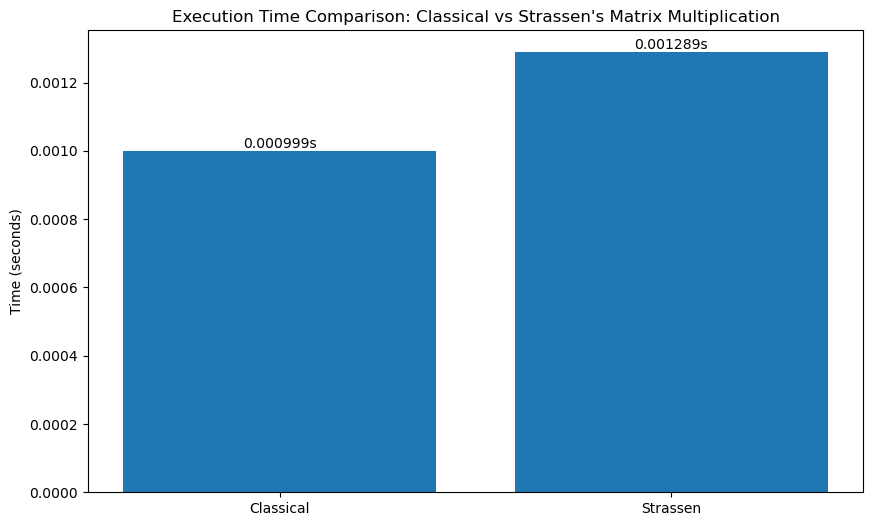

In [23]:
# Execute both algorithms

# Create comparison bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Classical', 'Strassen'], [classical_timeValue, strassen_timeValue])
plt.ylabel('Time (seconds)')
plt.title('Execution Time Comparison: Classical vs Strassen\'s Matrix Multiplication')

# Add value labels
plt.text(0, classical_timeValue, f'{classical_timeValue:.6f}s', ha='center', va='bottom')
plt.text(1, strassen_timeValue, f'{strassen_timeValue:.6f}s', ha='center', va='bottom')

plt.show()